# DAT405/DIT407 Introduction to Data Science and AI 
## 2022-2023, Reading Period 4
## Assignment 4: Spam classification using Naïve Bayes 
The exercise takes place in this notebook environment.
Hints:
You can execute certain linux shell commands by prefixing the command with `!`. You can insert Markdown cells and code cells. The first you can use for documenting and explaining your results the second you can use writing code snippets that execute the tasks required.  

In this assignment you will implement a Naïve Bayes classifier in Python that will classify emails into spam and non-spam (“ham”) classes.  Your program should be able to train on a given set of spam and “ham” datasets. 
You will work with the datasets available at https://spamassassin.apache.org/old/publiccorpus/. There are three types of files in this location: 
-	easy-ham: non-spam messages typically quite easy to differentiate from spam messages. 
-	hard-ham: non-spam messages more difficult to differentiate 
-	spam: spam messages 

**Execute the cell below to download and extract the data into the environment of the notebook -- it will take a few seconds.** If you chose to use Jupyter notebooks you will have to run the commands in the cell below on your local computer, with Windows you can use 
7zip (https://www.7-zip.org/download.html) to decompress the data.

**What to submit:** 
Convert the notebook to a pdf-file and submit it. Make sure all cells are executed so all your code and its results are included. Double check the pdf displays correctly before you submit it.

In [88]:
#Download and extract data
# !wget https://spamassassin.apache.org/old/publiccorpus/20021010_easy_ham.tar.bz2
# !wget https://spamassassin.apache.org/old/publiccorpus/20021010_hard_ham.tar.bz2
# !wget https://spamassassin.apache.org/old/publiccorpus/20021010_spam.tar.bz2
# !tar -xjf 20021010_easy_ham.tar.bz2
# !tar -xjf 20021010_hard_ham.tar.bz2
# !tar -xjf 20021010_spam.tar.bz2

*The* data is now in the three folders `easy_ham`, `hard_ham`, and `spam`.

In [89]:
!ls -lah

total 7984
drwxr-xr-x    11 chenbingcheng  staff   352B Apr 19 15:51 .
drwxr-xr-x    10 chenbingcheng  staff   320B Apr 19 10:03 ..
-rw-r--r--@    1 chenbingcheng  staff   6.0K Apr 19 14:14 .DS_Store
-rw-r--r--     1 chenbingcheng  staff   1.6M Jun 29  2004 20021010_easy_ham.tar.bz2
-rw-r--r--     1 chenbingcheng  staff   997K Dec 16  2004 20021010_hard_ham.tar.bz2
-rw-r--r--     1 chenbingcheng  staff   1.1M Jun 29  2004 20021010_spam.tar.bz2
-rw-r--r--@    1 chenbingcheng  staff   169K Apr 20 17:11 IDSAI_Assignment4_By_Bingcheng.ipynb
drwx--x--x  2553 chenbingcheng  staff    80K Oct 10  2002 easy_ham
drwx--x--x   252 chenbingcheng  staff   7.9K Dec 16  2004 hard_ham
drwxr-xr-x   503 chenbingcheng  staff    16K Oct 10  2002 spam
-rw-r--r--     1 chenbingcheng  staff   912B Apr 19 16:57 test.py


### 1. Preprocessing: 

##### 1.1 Look at a few emails from easy_ham, hard_ham and spam. Do you think you would be able to classify the emails just by inspection? How do you think a succesful model can learn the difference between the different classes of emails?


**Answer:**

It's not hard for me to classify the emails, since spam emails are usually with the intention of promoting a product, service. there are several features that a spam email may have:
- Suspicious sender: the email sent from a unfamiliar email address.
- Deceptive subject: A spam email may use deceptive subject such as offering free products to attract receivers' clicks
- Spam-like word: A spam email is more likely to use some specific words, such as dollar, invest, free. 

A successful model can learn the difference between the different classes of emails through data science and AI, like what we have done in this assignment - using Naïve Bayes Classifiers:
- First, feed the model with high quality datasets of different types of emails, which have already been labeled as spam or ham by human.
- Second, train the model on these datasets, learning to identify patterns in the features of the emails that are associated with spam or ham.
- Third, test the model on a separate set of dataset to evaluate its performance.
- Fourth, iterate and optimise the model through the training and testing process, adjust the model's parameters and feed more high quality labeled datasets to the model.

In [90]:
import os
import random

# Set directory path for easy_ham and spam
easy_ham_dir = 'easy_ham'
hard_ham_dir = 'hard_ham'
spam_dir = 'spam'

# Get the list of file names in each fold
easy_ham_files = [os.path.join(easy_ham_dir, file) for file in os.listdir(easy_ham_dir)]
hard_ham_files = [os.path.join(hard_ham_dir, file) for file in os.listdir(hard_ham_dir)]
spam_files = [os.path.join(spam_dir, file) for file in os.listdir(spam_dir)][1:]

# Choose 1 random file from each type
random.seed(42)
random_easy_ham = random.sample(easy_ham_files,1)
random_hard_ham = random.sample(hard_ham_files,1)
random_spam = random.sample(spam_files,1)

# Print the name of the chosen files
print(random_easy_ham)
print(random_hard_ham)
print(random_spam)

# List of files to be read
read_list = random_easy_ham + random_hard_ham +random_spam

# Loop through the list and read each file
for file_name in read_list:
    with open(file_name, 'r', encoding='utf-8', errors='ignore') as file:
        # print contents
        print('############################ No.{} email##############################'.format(read_list.index(file_name)+1))
        print(file.read())

['easy_ham/1224.7917f240eb278ea2028d92515d8c3dbc']
['hard_ham/0228.651a40f1c0b2ba19122eccebccbae788']
['spam/0348.e0b89978fa806cf3e7fd3ba0869b3c65']
############################ No.1 email##############################
From exmh-workers-admin@redhat.com  Mon Sep 30 21:43:56 2002
Return-Path: <exmh-workers-admin@example.com>
Delivered-To: yyyy@localhost.example.com
Received: from localhost (jalapeno [127.0.0.1])
	by jmason.org (Postfix) with ESMTP id 805F016F03
	for <jm@localhost>; Mon, 30 Sep 2002 21:43:55 +0100 (IST)
Received: from jalapeno [127.0.0.1]
	by localhost with IMAP (fetchmail-5.9.0)
	for jm@localhost (single-drop); Mon, 30 Sep 2002 21:43:55 +0100 (IST)
Received: from listman.example.com (listman.example.com [66.187.233.211]) by
    dogma.slashnull.org (8.11.6/8.11.6) with ESMTP id g8UJ3gK12263 for
    <jm-exmh@jmason.org>; Mon, 30 Sep 2002 20:03:42 +0100
Received: from listman.example.com (localhost.localdomain [127.0.0.1]) by
    listman.redhat.com (Postfix) with ESMTP id 

##### 1.2 Note that the email files contain a lot of extra information, besides the actual message. Ignore that for now and run on the entire text (in the optional part further down can experiment with filtering out the headers and footers). We don’t want to train and test on the same data (it might help to reflect on why if you don't recall). Split the spam and the ham datasets in a training set and a test set. (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`). Use only the easy_ham part as ham data for quesions 1 and 2.

Answer 1.1:

In [91]:
def read_files(file_list):
    # files = os.listdir(file_fold)
    messages = []
    for file in file_list:
        with open(file, 'r', encoding='utf-8', errors='ignore') as f:
            content = f.read()
            messages.append((content, "ham" if "ham" in file else "spam"))
    return messages

easy_ham_message = read_files(easy_ham_files)
hard_ham_message = read_files(hard_ham_files)
spam_messages = read_files(spam_files)

In [92]:
from sklearn.model_selection import train_test_split

# Split the ham and spam files into training and testing datasets
hamtrain, hamtest = train_test_split(easy_ham_message, test_size=0.2, random_state=42)
spamtrain, spamtest = train_test_split(spam_messages, test_size=0.2, random_state=42)
ham_hardtrain, ham_hardtest = train_test_split(hard_ham_message, test_size=0.2, random_state=42)


# Print the number of the traning/testing datasets
print("Number of hamtrain:", len(hamtrain))
print("Number of hamtest:", len(hamtest))
print("Number of spamtrain:", len(spamtrain))
print("Number of spamtest:", len(spamtest))

Number of hamtrain: 2040
Number of hamtest: 511
Number of spamtrain: 400
Number of spamtest: 100


### 2.1 Write a Python program that: 
1.	Uses the four datasets from Question 1 (`hamtrain`, `spamtrain`, `hamtest`, and `spamtest`) 
2.	Trains a Naïve Bayes classifier (use the [scikit-learn library](https://scikit-learn.org/stable/)) on `hamtrain` and `spamtrain`, that classifies the test sets and reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets. Use `CountVectorizer` ([Documentation here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html#sklearn.feature_extraction.text.CountVectorizer)) to transform the email texts into vectors. Please note that there are different types of Naïve Bayes Classifier in scikit-learn ([Documentation here](https://scikit-learn.org/stable/modules/naive_bayes.html)). Test two of these classifiers that are well suited for this problem:
- Multinomial Naive Bayes  
- Bernoulli Naive Bayes. 

Please inspect the documentation to ensure input to the classifiers is appropriate before you start coding. 



In [93]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a Vectorizer Object
vectorizer = CountVectorizer()

# convert text to numerical data
X_train = vectorizer.fit_transform([message[0] for message in hamtrain+spamtrain])
y_train = [message[1] for message in hamtrain+spamtrain]

X_test = vectorizer.transform([message[0] for message in hamtest+spamtest])
y_test = [message[1] for message in hamtest+spamtest]

# Printing the identified Unique words along with their indices
# print("Vocabulary: ", vectorizer.vocabulary_)

#### 2.1.1 Multinomial Naive Bayes

True Positive Rate: 0.85
False Negative Rate: 0.15
Accuracy: 0.974


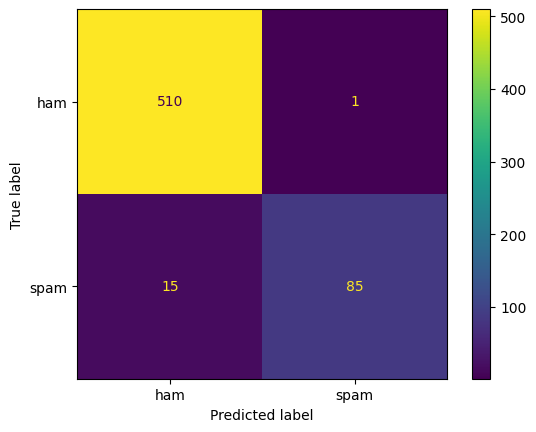

In [94]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 100

# create Multinomial Naive Bayes model object and fit it
mnb = MultinomialNB()
mnb.fit(X_train, y_train)

# predit X_test dataset
y_pred = mnb.predict(X_test)

# reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets.
tn1, fp1, fn1, tp1 = confusion_matrix(y_test, y_pred).ravel()
print("True Positive Rate:", tp1 / (tp1 + fn1))
print("False Negative Rate:", fn1 / (tp1 + fn1))

# accuracy score
accuracy_1 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_1:.3f}")

# plot the comfusionMatrix
cm = confusion_matrix(y_test, y_pred, labels=mnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_)
disp.plot()

#### 2.1.2 Bernoulli Naive Bayes

True Positive Rate: 0.48
False Negative Rate: 0.52
Accuracy: 0.913


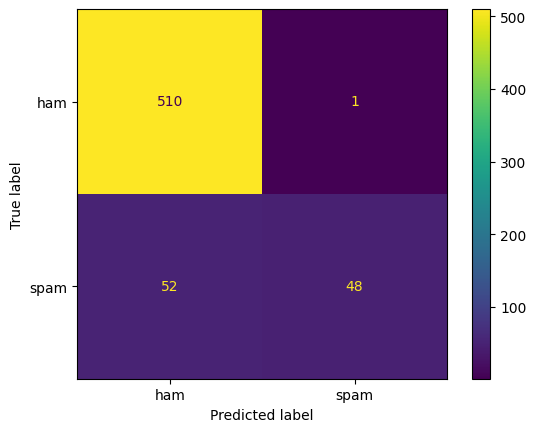

In [95]:
from sklearn.naive_bayes import BernoulliNB

# create Bernoulli Naive Bayes model object and fit it
bnb = BernoulliNB(force_alpha=True,binarize=0.0)
bnb.fit(X_train, y_train)

# predit X_test dataset
y_pred = bnb.predict(X_test)

# reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets.
tn2, fp2, fn2, tp2 = confusion_matrix(y_test, y_pred).ravel()
print("True Positive Rate:", tp2 / (tp2 + fn2))
print("False Negative Rate:", fn2 / (tp2 + fn2))

# accuracy score
accuracy_2 = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy_2:.3f}")

# plot the comfusionMatrix
cm = confusion_matrix(y_test, y_pred, labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bnb.classes_)
disp.plot()

### 2.2 Answer the following questions:
##### a) What does the CountVectorizer do?
**Answer 2.2.a** 

Countvectorizer is used to convert text to numerical matrix, in which each row represents a document and each column represents a unique word in the vocabulary. The values in the matrix represent the frequency of the corresponding word.  
Usually, we use it to preprocessing the text dataset for machine learning algorithms that require numerical input data.

##### b) What is the difference between Multinomial Naive Bayes and Bernoulli Naive Bayes
**Answer 2.2.b**
- In Multinomial Naive Bayes, the converted matrix has discrete values, however in Bernoulli Naive Bayes model, the discrete values would be converted to 0 and 1 based on threshold set.
- Multinomial Naive Bayes works well with frequency-based features, such as frequency of a word in a document, Bernoulli Naive Bayes works well with binary features, such as whether a word appears in a document or not.
- In this case, after comparing the performance of two models, Multinomial Naive Bayes works better than Bernoulli Naive Bayes.

### 3.1 Run the two models:
Run (don't retrain) the two models from Question 2 on spam versus hard-ham. Does the performance differ compared to question 2 when the model was run on spam versus easy-ham? If so, why?

#### 3.1.1 Multinomial Naive Bayes (on spam versus hard-ham, don't retrain)

True Positive Rate: 0.85
False Negative Rate: 0.15
Accuracy: 0.693


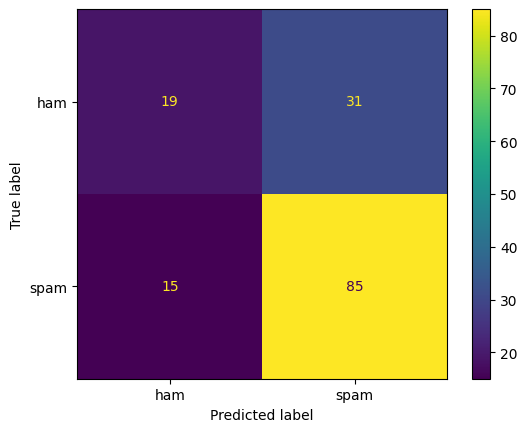

In [96]:
# reconstruct the testing dataset, using ham_hardtest+spamtest 
X_test_hard = vectorizer.transform([message[0] for message in ham_hardtest+spamtest])
y_test_hard = [message[1] for message in ham_hardtest+spamtest]

# predit X_test_hard dataset
y_pred_hard = mnb.predict(X_test_hard)

# reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets.
tn3, fp3, fn3, tp3 = confusion_matrix(y_test_hard, y_pred_hard).ravel()
print("True Positive Rate:", tp3 / (tp3 + fn3))
print("False Negative Rate:", fn3 / (tp3 + fn3))

# accuracy score
accuracy_3 = accuracy_score(y_test_hard, y_pred_hard)
print(f"Accuracy: {accuracy_3:.3f}")

# plot the comfusionMatrix
cm = confusion_matrix(y_test_hard, y_pred_hard, labels=mnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mnb.classes_)
disp.plot()

#### 3.1.2 Bernoulli Naive Bayes (on spam versus hard-ham, don't retrain)

True Positive Rate: 0.48
False Negative Rate: 0.52
Accuracy: 0.453


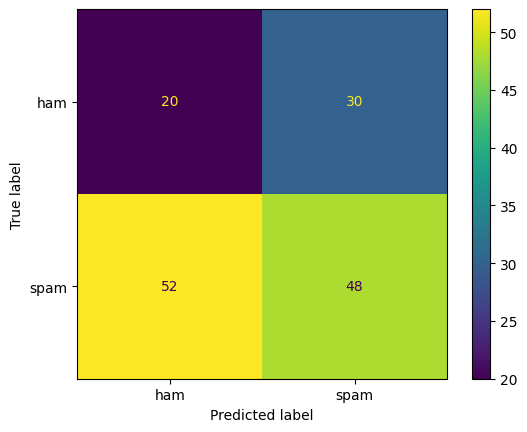

In [97]:
# predit X_test_hard dataset
y_pred_hard = bnb.predict(X_test_hard)

# reports True Positive and False Negative rates on the `hamtest` and `spamtest` datasets.
tn4, fp4, fn4, tp4 = confusion_matrix(y_test_hard, y_pred_hard).ravel()
print("True Positive Rate:", tp4 / (tp4 + fn4))
print("False Negative Rate:", fn4 / (tp4 + fn4))

# accuracy score
accuracy_4 = accuracy_score(y_test_hard, y_pred_hard)
print(f"Accuracy: {accuracy_4:.3f}")

# plot the comfusionMatrix
cm = confusion_matrix(y_test_hard, y_pred_hard, labels=bnb.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=bnb.classes_)
disp.plot()

**Answer 3.1:**

When both models were run on spam versus hard-ham, their performance was worse than that achieved in question 2 when the model was run on spam versus easy-ham.

- For Multinomial Naive Bayes, the accuracy decreased from 0.974 to 0.693.
- For Bernoulli Naive Bayes, the accuracy decreased from 0.913 to 0.453.

This is because the hard-ham dataset was not included in the model's training process, this dataset contains some 'new information' that the model did not know, thus the model's performance dropped a lot on prediting hard-ham dateset.

In both models, the true positive rate and false negative rate remained unchanged, as the model itself was not altered and the spam testing dataset remained the same. As a result, we would expect to see same results between the two models.

### 3.2 Retrain
Retrain new Multinomial and Bernolli Naive Bayes classifers on the combined (easy+hard) ham and spam. Now evaluate on spam versus hard-ham as in 3.1. Also evaluate on spam versus easy-ham. Compare the performance with question 2 and 3.1. What do you observe?

In [98]:
# Create a Vectorizer Object
vectorizer2 = CountVectorizer()

# convert text to numerical data
X_train = vectorizer2.fit_transform([message[0] for message in hamtrain+ham_hardtrain+spamtrain])
y_train = [message[1] for message in hamtrain+ham_hardtrain+spamtrain]

# convert spam versus hard-ham dataset as in question 3.1.
X_test_hard_spam = vectorizer2.transform([message[0] for message in ham_hardtest+spamtest])
y_test_hard_spam = [message[1] for message in ham_hardtest+spamtest]

# convert spam versus easy-ham dataset as in question 2.
X_test_easy_spam = vectorizer2.transform([message[0] for message in hamtest+spamtest])
y_test_easy_spam = [message[1] for message in hamtest+spamtest]

#### 3.2.1 Multinomial Naive Bayes (retrain)

In [99]:
# create Multinomial Naive Bayes model object and fit it
mnb2 = MultinomialNB()
mnb2.fit(X_train, y_train)

print('#######Spam vs. hard-ham, Multinomial Naive Bayes retrain, comparing with question 3.1. #######')
# predit spam versus hard-ham dataset comparing with question 3.1.
y_pred_hard_mnb = mnb2.predict(X_test_hard_spam)

# reports True Positive and False Negative rates
tn5, fp5, fn5, tp5 = confusion_matrix(y_test_hard_spam, y_pred_hard_mnb).ravel()
print("True Positive Rate:", tp5 / (tp5 + fn5))
print("False Negative Rate:", fn5 / (tp5 + fn5))

# accuracy score
accuracy_5 = accuracy_score(y_test_hard_spam, y_pred_hard_mnb)
print(f"Accuracy: {accuracy_5:.3f}")


print('\n#######spam vs. easy-ham, Multinomial Naive Bayes retrain, comparing with question 2.#######')
# predit spam versus easy-ham dataset comparing with question 2.
y_predit_easy_mnb = mnb2.predict(X_test_easy_spam)

# reports True Positive and False Negative rates
tn6, fp6, fn6, tp6 = confusion_matrix(y_test_easy_spam, y_predit_easy_mnb).ravel()
print("True Positive Rate:", tp6 / (tp6 + fn6))
print("False Negative Rate:", fn6 / (tp6 + fn6))

# accuracy score
accuracy_6 = accuracy_score(y_test_easy_spam, y_predit_easy_mnb)
print(f"Accuracy: {accuracy_6:.3f}")

#######Spam vs. hard-ham, Multinomial Naive Bayes retrain, comparing with question 3.1. #######
True Positive Rate: 0.91
False Negative Rate: 0.09
Accuracy: 0.933

#######spam vs. easy-ham, Multinomial Naive Bayes retrain, comparing with question 2.#######
True Positive Rate: 0.91
False Negative Rate: 0.09
Accuracy: 0.985


#### 3.2.2 Bernoulli Naive Bayes (retrain)

In [100]:
# create Bernoulli Naive Bayes model object and fit it
bnb2 = BernoulliNB(force_alpha=True,binarize=0.0)
bnb2.fit(X_train, y_train)

print('#######Spam vs. hard-ham, Bernoulli Naive Bayes retrain, comparing with question 3.1. #######')
# predit spam versus hard-ham dataset comparing with question 3.1.
y_pred_hard_bnb = bnb2.predict(X_test_hard_spam)

# reports True Positive and False Negative rates
tn7, fp7, fn7, tp7 = confusion_matrix(y_test_hard_spam, y_pred_hard_bnb).ravel()
print("True Positive Rate:", tp7 / (tp7 + fn7))
print("False Negative Rate:", fn7 / (tp7 + fn7))

# accuracy score
accuracy_7 = accuracy_score(y_test_hard_spam, y_pred_hard_bnb)
print(f"Accuracy: {accuracy_7:.3f}")


print('\n#######spam vs. easy-ham, Bernoulli Naive Bayes retrain, comparing with question 2.#######')
# predit spam versus easy-ham dataset comparing with question 2.
y_predit_easy_bnb = bnb2.predict(X_test_easy_spam)

# reports True Positive and False Negative rates
tn8, fp8, fn8, tp8 = confusion_matrix(y_test_easy_spam, y_predit_easy_bnb).ravel()
print("True Positive Rate:", tp8 / (tp8 + fn8))
print("False Negative Rate:", fn8 / (tp8 + fn8))

# accuracy score
accuracy_8 = accuracy_score(y_test_easy_spam, y_predit_easy_bnb)
print(f"Accuracy: {accuracy_8:.3f}")

#######Spam vs. hard-ham, Bernoulli Naive Bayes retrain, comparing with question 3.1. #######
True Positive Rate: 0.22
False Negative Rate: 0.78
Accuracy: 0.480

#######spam vs. easy-ham, Bernoulli Naive Bayes retrain, comparing with question 2.#######
True Positive Rate: 0.22
False Negative Rate: 0.78
Accuracy: 0.872


**Plot**

In [158]:
def addlabels(x,y,rows,cloumns,index):
    for j in range(len(x)):
        plt.subplot(rows,cloumns,index).text(x[j], y[j], y[j], ha = 'center',weight = 'bold', fontsize=12)

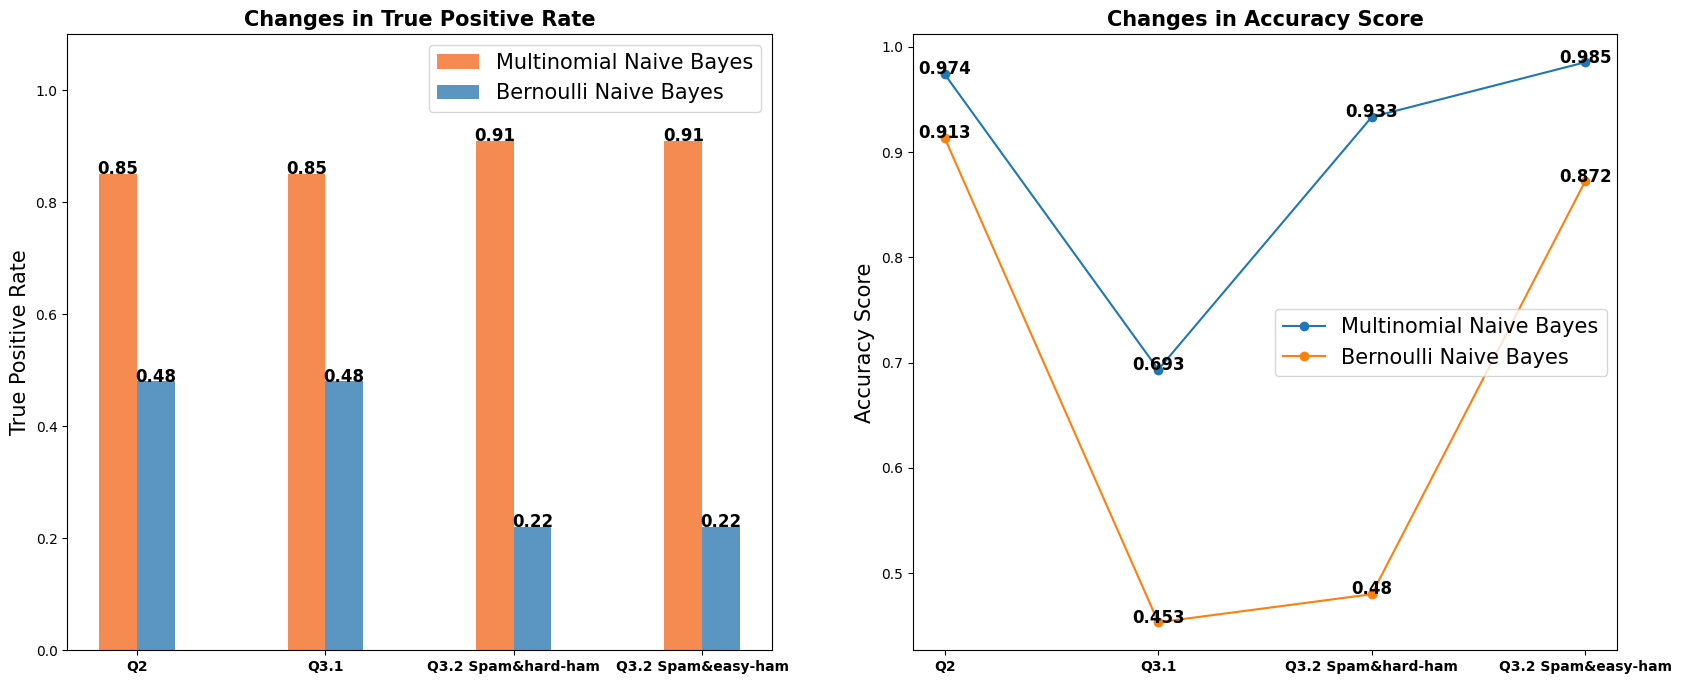

In [159]:
import numpy as np

multi_tp = [tp1/(tp1+fn1), tp3/(tp3+fn3), tp5/(tp5+fn5), tp6/(tp6+fn6)]
Bernou_tp = [tp2/(tp2+fn2), tp4/(tp4+fn4), tp7/(tp7+fn7), tp8/(tp8+fn8)]

multi_accuracy = [accuracy_1, accuracy_3, accuracy_5, accuracy_6]
Bernou_accuracy = [accuracy_2,accuracy_4, accuracy_7, accuracy_8]

X = ['Q2', 'Q3.1', 'Q3.2 Spam&hard-ham', 'Q3.2 Spam&easy-ham']
X_axis = np.arange(len(X))

fig, (ax1, ax2) = plt.subplots(1, 2,figsize = (20, 8))
ax1.bar(X_axis - 0.1, multi_tp, 0.2, label = 'Multinomial Naive Bayes',color='#F58B51')
ax1.bar(X_axis + 0.1, Bernou_tp, 0.2, label = 'Bernoulli Naive Bayes',color='#5B96C2')
ax1.set_xticks(X_axis, X, weight='bold')
ax1.set_ylabel('True Positive Rate',fontsize=15)
addlabels(X_axis - 0.1,multi_tp,1,2,1)
addlabels(X_axis + 0.1,Bernou_tp,1,2,1)
ax1.legend(fontsize=15)
ax1.set_ylim([0,1.1])
ax1.set_title('Changes in True Positive Rate',fontsize=15,weight='bold')

ax2.plot(X,multi_accuracy,label='Multinomial Naive Bayes',marker = 'o')
ax2.plot(X,Bernou_accuracy,label='Bernoulli Naive Bayes',marker = 'o')
ax2.set_ylabel('Accuracy Score',fontsize=15)
ax2.legend(fontsize=15)
ax2.set_title('Changes in Accuracy Score',fontsize=15, weight='bold')
addlabels(X_axis,np.round(multi_accuracy,3),1,2,2)
addlabels(X_axis,np.round(Bernou_accuracy,3),1,2,2)
ax2.set_xticks(X_axis, X, weight='bold')

plt.show()

**Answer 3.2:**

- After combined (easy+hard) ham and spam datasets to retrain the model, 

### 3.3 Further improvements
Do you have any suggestions for how performance could be further improved? You don't have to implement them, just present your ideas.

Answer 3.3: